(-0.5, 1073.5, 1279.5, -0.5)

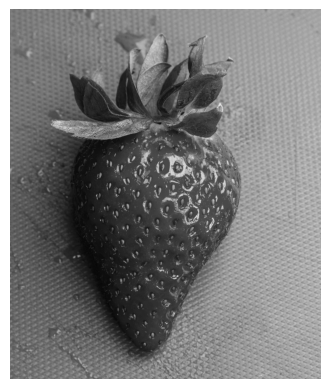

In [22]:
from skimage import io,img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt
 
img = img_as_ubyte(io.imread('strawberry.png',as_gray=True))
plt.imshow(img,cmap="gray")
plt.xlabel("origin photo")
plt.axis('off')


Text(0.5, 0, 'histogram')

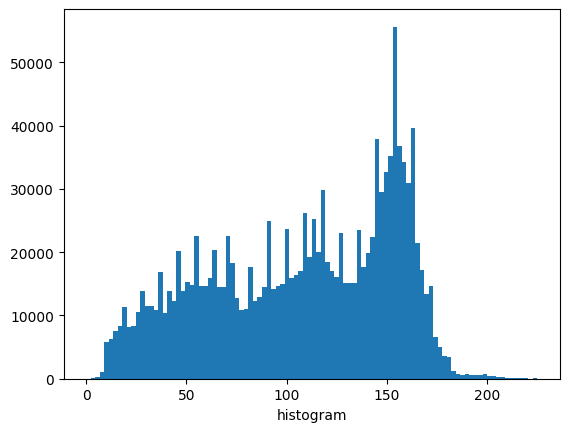

In [23]:

# 直方图显示
plt.hist(img.flat,bins=100,range=(0,225))
plt.xlabel("histogram")


Text(0.5, 0, 'segmentation by hand')

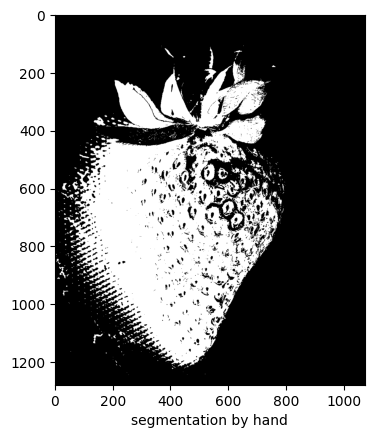

In [19]:


## set your threshold here
threhold = ?
segm = ?
## fill your code
plt.imshow(segm,cmap="gray")
plt.xlabel("segmentation by hand")
plt.axis('off')

the OTSU therohold is :  66


(-0.5, 1073.5, 1279.5, -0.5)

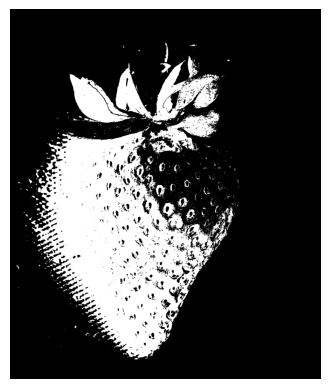

In [25]:
import numpy as np
 
def OTSU(img_array):
	height = img_array.shape[0]
	width = img_array.shape[1]
	count_pixel = np.zeros(256)
 
	for i in range(height):
		for j in range(width):
			count_pixel[int(img_array[i][j])] += 1 
 
	max_variance = 0.0
	best_thresold = 0
	##
	## implement your method here
	##
 
	return best_thresold


otsu_the = OTSU(img)
print("the OTSU therohold is : ", otsu_the)
segm = (img<=otsu_the)
plt.imshow(segm,cmap="gray")
plt.xlabel("segmentation by OTSU")
plt.axis('off')


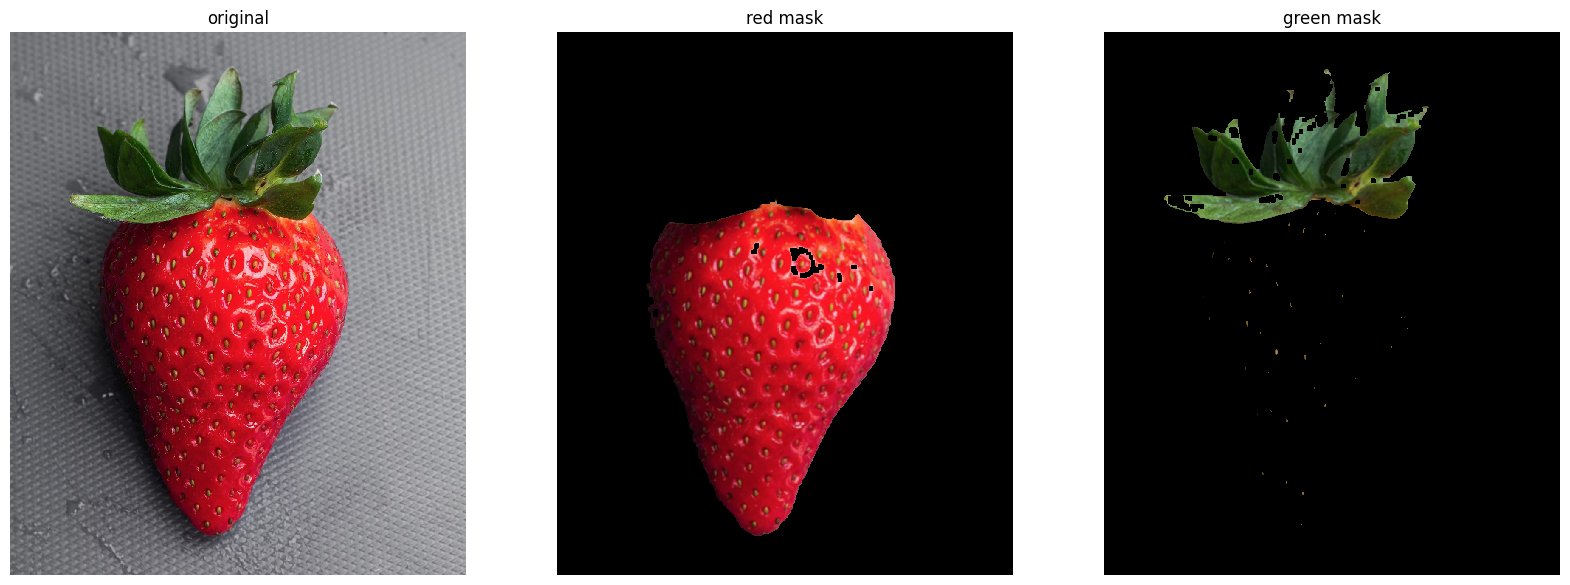

In [21]:
from abc import ABC, abstractmethod

import numpy as np
import cv2 as cv

class Mask(ABC):
    @classmethod
    @abstractmethod
    def mask(cls, hsv_image):
        """Create a mask based on predefined hsv ranges."""

class Red(Mask):
    # Range for low hue
    low_1 = np.array([0, 125, 20])
    high_1 = np.array([10, 255, 255])
    # Range for high hue
    low_2 = np.array([170, 125, 20])
    high_2 = np.array([180, 255, 255])

    @classmethod
    def mask(cls, hsv_image):
        mask_1 = cv.inRange(hsv_image, cls.low_1, cls.high_1)
        mask_2 = cv.inRange(hsv_image, cls.low_2, cls.high_2)

        return mask_1 + mask_2


class Green(Mask):
    low = np.array([17, 79, 19])
    high = np.array([76, 217, 153])

    @classmethod
    def mask(cls, hsv_image):
        return cv.inRange(hsv_image, cls.low, cls.high)

import argparse
import os

import cv2 as cv
import numpy as np

def segment(image_path: str, mask: Mask, blur: bool = True, close: bool = True):
    """Read RGB image, perform segmentation with given mask and return result."""

    image_rgb = cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2RGB)

    # Gaussian blur if high frequency noise reduction is needed
    if blur:
        image_rgb = cv.GaussianBlur(image_rgb, (5, 5), cv.BORDER_DEFAULT)

    # Convert to HSV
    image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)

    # Create mask
    masked = mask.mask(image_hsv)

    # Morphological closing for more noise reduction
    if close:
        masked = cv.morphologyEx(masked, cv.MORPH_CLOSE, np.ones((9, 9), np.uint8))

    # Apply mask
    segmented_image = cv.bitwise_and(image_rgb, image_rgb, mask=masked)

    return segmented_image


image_path = "sb.png"


fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(131)
ax.set_title("original")
ax.axis("off")
image = cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2RGB)
_ = ax.imshow(image, interpolation="nearest")

ax = fig.add_subplot(132)
ax.set_title("red mask")
ax.axis("off")
image = segment(image_path, Red)
_ = ax.imshow(image, interpolation="nearest")

ax = fig.add_subplot(133)
ax.set_title("green mask")
ax.axis("off")
image = segment(image_path, Green)
_ = ax.imshow(image, interpolation="nearest")
